In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import math 

from spec_bin import *
#from lanczos_bin import mystep,distribution

from IPython.display import clear_output
np.set_printoptions(linewidth=300)
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def mu_T(x,a,b): 
    with np.errstate(divide='ignore',invalid='ignore'):
        return 1/(np.pi)/(np.sqrt((x-a)*(b-x)))

In [4]:
np.random.seed(0)

kn=23
kk=11

λ = np.array([(-1)**i*math.comb(kn-kk-i,kk-i) for i in range(kk+1)])
mult = np.array([math.comb(kn,i) - math.comb(kn,i-1) if i>0 else 1 for i in range(kk+1)])

idx = np.argsort(λ)
λ,mult = λ[idx], mult[idx]

A = sp.sparse.load_npz(f'matrices/K_{kn}_{kk}.npz')
n = A.shape[0]
n_trials = 1

v = np.sign(np.random.rand(n)-.5) / np.sqrt(n)

k = 12
(α,β) = lanczos(A,v,k)

a = -kk-.1
b = kk+1.1

kT = 250
sT = 2*kT
αT = np.ones(sT+1)*(a+b)/2
βT = np.ones(sT+1)*(b-a)/4
βT[0] *= np.sqrt(2)
mT = get_chebyshev_moments(A,v,kT,a,b)


In [5]:
θ,ω = get_gq(k,α[:12],β[:11])
xx = np.linspace(a,b,5000)
AQ_T = eval_poly(xx,mT*jackson_weights(2*kT+1),αT,βT)

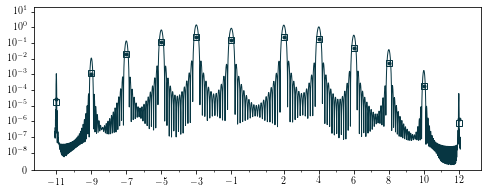

In [6]:
plt.subplots(1,1,figsize=(8,3))

plt.plot(xx,AQ_T*mu_T(xx,a,b),lw=1,color='#073642')

plt.plot(θ,ω,ls='None',marker='o',ms=3,color='#073642')
plt.plot(λ,mult/sum(mult),ls='None',marker='s',fillstyle='none',color='#073642')


plt.gca().set_xticks(np.arange(int(a),round(b)+1), minor=True)
plt.xticks(λ)

plt.ylim(0,20)
plt.yscale('symlog',linthreshy=1e-8)
plt.savefig('imgs/Kneser_smoothed.pdf',bbox_inches='tight')